In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
ls MAG/

scores_lmm_across_time-initial_second-UC_control_UC-MAGs.tsv
scores_lmm_across_time-initial_second-UC_control_control-MAGs.tsv
scores_single_sample-initial_second-UC_control_UC-MAGs.tsv
scores_single_sample-initial_second-UC_control_control-MAGs.tsv


In [34]:
'''
scores_lmm_across_time-initial_second-UC_control_UC-MAGs.tsv
This file contains LMM scores for allele-frequency changes across time (initial vs. second) 
when comparing UC control vs. UC case groups.
It tests whether the trajectory of allele frequency change differs between UC patients and controls.
UC_control_UC → between-group (control vs. UC cases over time).


scores_lmm_across_time-initial_second-UC_control_control-MAGs.tsv 
This file contains LMM scores for allele-frequency changes across time (initial vs. second) 
within the UC control group.
High score_LMM (%) → that MAG has a higher proportion of sites with significant differences 
in allele frequency trajectories between UC and controls.
Low score_LMM (%) → few or no sites show significant differences.
UC_control_control → within-group (control vs. itself over time).
implemented in alleleflux/statistics/LMM.py


scores_single_sample-initial_second-UC_control_UC-MAGs.tsv
generated by single_sample.py, this one is a between-group test.
Compares UC controls vs. UC patients for changes in allele frequencies between initial and second timepoints.
#Do UC patients show a different allele-frequency trajectory compared to controls?

scores_single_sample-initial_second-UC_control_control-MAGs.tsv
Tests within the UC control group for allele-frequency changes between the initial and second timepoints.
Did allele frequencies in controls shift over time?
'''

In [54]:
df_control_control = pd.read_csv("MAG/scores_single_sample-initial_second-UC_control_control-MAGs.tsv", sep="\t")
df_control_control

,MAG_ID,domain,phylum,class,order,family,genus,species,total_sites_per_group_tTest_control,total_sites_per_group_Wilcoxon_control,significant_sites_per_group_tTest_control,significant_sites_per_group_Wilcoxon_control,score_tTest_control (%),score_Wilcoxon_control (%),grouped_by
0,MGYG000000003,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes shahii,39065,39065,176,12,0.450531,0.030718,MAG_ID
1,MGYG000000013,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides vicugnae,33096,33096,28,6,0.084602,0.018129,MAG_ID
2,MGYG000000022,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,50475,50475,250,61,0.495295,0.120852,MAG_ID
3,MGYG000000029,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides finegoldii,29257,29257,13,0,0.044434,0.000000,MAG_ID
4,MGYG000000038,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Dorea_A,Dorea_A longicatena,77,77,0,0,0.000000,0.000000,MAG_ID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,MGYG000004658,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes finegoldii,31171,31171,71,1,0.227776,0.003208,MAG_ID
78,MGYG000004679,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,11941,11941,21,3,0.175865,0.025124,MAG_ID
79,MGYG000004768,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes avicola,762,762,1,1,0.131234,0.131234,MAG_ID
80,MGYG000004769,Bacteria,Bacillota,Negativicutes,Acidaminococcales,Acidaminococcaceae,Phascolarctobacterium,Phascolarctobacterium faecium,8030,8030,5,0,0.062267,0.000000,MAG_ID


In [56]:
df_control_control['score_tTest_control (%)'].max()

1.0117915557246102

In [57]:
df_control_control['score_Wilcoxon_control (%)'].max() #non-parrametric

0.8701271724328941

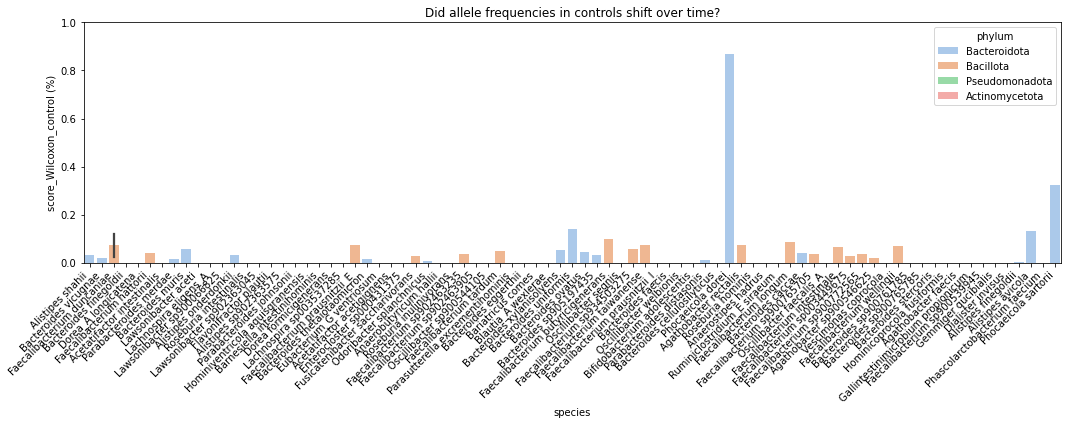

In [75]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_control_control, x='species', y='score_Wilcoxon_control (%)', palette='pastel', hue='phylum')
plt.xticks(rotation=45, ha='right')
# Set y-axis from 0 to 1 with step 0.2
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.title("Did allele frequencies in controls shift over time?")
plt.tight_layout()
plt.show()

In [70]:
df_control_UC = pd.read_csv("MAG/scores_single_sample-initial_second-UC_control_UC-MAGs.tsv", sep="\t")
df_control_UC

,MAG_ID,domain,phylum,class,order,family,genus,species,total_sites_per_group_tTest_UC,total_sites_per_group_Wilcoxon_UC,significant_sites_per_group_tTest_UC,significant_sites_per_group_Wilcoxon_UC,score_tTest_UC (%),score_Wilcoxon_UC (%),grouped_by
0,MGYG000000002,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Blautia_A,Blautia_A faecis,616,616,1,0,0.162338,0.000000,MAG_ID
1,MGYG000000013,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides vicugnae,52763,52763,38,2,0.072020,0.003791,MAG_ID
2,MGYG000000022,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,31313,31313,35,0,0.111775,0.000000,MAG_ID
3,MGYG000000029,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides finegoldii,27350,27350,41,1,0.149909,0.003656,MAG_ID
4,MGYG000000038,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Dorea_A,Dorea_A longicatena,407,407,0,0,0.000000,0.000000,MAG_ID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,MGYG000003937,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Gemmiger,Gemmiger qucibialis,1295,1295,4,0,0.308880,0.000000,MAG_ID
60,MGYG000004296,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Oliverpabstia,Oliverpabstia faecicola,95,95,0,0,0.000000,0.000000,MAG_ID
61,MGYG000004679,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,7020,7020,6,2,0.085470,0.028490,MAG_ID
62,MGYG000004769,Bacteria,Bacillota,Negativicutes,Acidaminococcales,Acidaminococcaceae,Phascolarctobacterium,Phascolarctobacterium faecium,12334,12334,0,0,0.000000,0.000000,MAG_ID


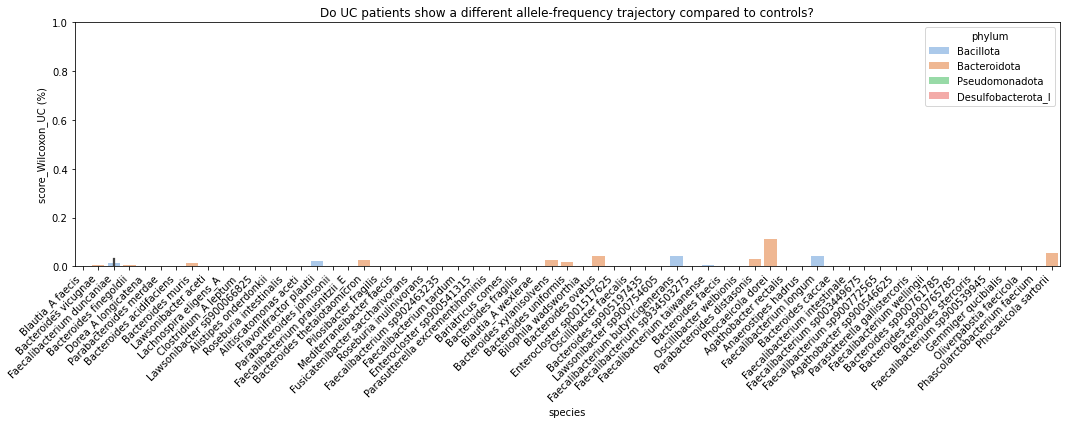

In [74]:
#Do UC patients show a different allele-frequency trajectory compared to controls?
plt.figure(figsize=(15,6))
sns.barplot(data=df_control_UC, x='species', y='score_Wilcoxon_UC (%)', palette='pastel', hue='phylum')
plt.xticks(rotation=45, ha='right')
# Set y-axis from 0 to 1 with step 0.2
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.title("Do UC patients show a different allele-frequency trajectory compared to controls?")
plt.tight_layout()
plt.show()

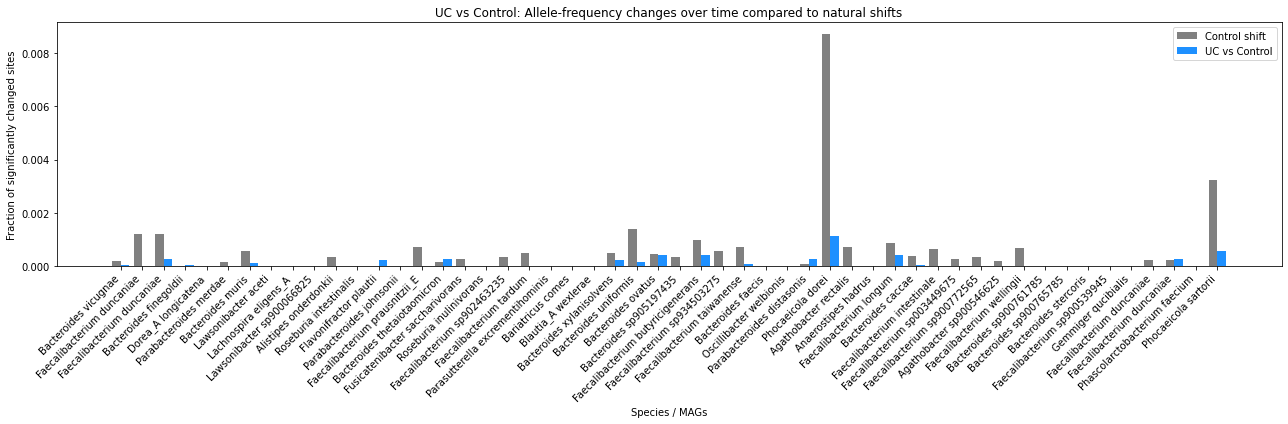

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load TSV files
df_control = pd.read_csv("MAG/scores_single_sample-initial_second-UC_control_control-MAGs.tsv", sep="\t")
df_UC_vs_control = pd.read_csv("MAG/scores_single_sample-initial_second-UC_control_UC-MAGs.tsv", sep="\t")

# Merge on species (or MAG_ID) for plotting
df_plot = pd.merge(
    df_control[['species', 'score_Wilcoxon_control (%)']],
    df_UC_vs_control[['species', 'score_Wilcoxon_UC (%)']],
    on='species',
    how='inner'
)

# Convert percentages to 0-1 scale if needed
df_plot['score_Wilcoxon_control (%)'] = df_plot['score_Wilcoxon_control (%)'] / 100
df_plot['score_Wilcoxon_UC (%)'] = df_plot['score_Wilcoxon_UC (%)'] / 100

# Set figure
plt.figure(figsize=(18,6))

# Bar width and x locations
bar_width = 0.4
x = np.arange(len(df_plot))

# Plot bars
plt.bar(x - bar_width/2, df_plot['score_Wilcoxon_control (%)'], width=bar_width, color='gray', label='Control shift')
plt.bar(x + bar_width/2, df_plot['score_Wilcoxon_UC (%)'], width=bar_width, color='dodgerblue', label='UC vs Control')

# Rotate x-axis labels
plt.xticks(x, df_plot['species'], rotation=45, ha='right')

# Y-axis limits and ticks
#plt.ylim(0, 1)
#plt.yticks(np.arange(0, 1.1, 0.2))

# Labels and title
plt.xlabel("Species / MAGs")
plt.ylabel("Fraction of significantly changed sites")
plt.title("UC vs Control: Allele-frequency changes over time compared to natural shifts")
plt.legend()
plt.tight_layout()
plt.show()


In [82]:
df_lmm_across_time_control_UC = pd.read_csv('MAG/scores_lmm_across_time-initial_second-UC_control_UC-MAGs.tsv',sep='\t')

In [83]:
df_lmm_across_time_control_UC

,MAG_ID,domain,phylum,class,order,family,genus,species,total_sites_per_group_LMM,significant_sites_per_group_LMM,score_LMM (%),grouped_by
0,MGYG000000002,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Blautia_A,Blautia_A faecis,616,7,1.136364,MAG_ID
1,MGYG000000013,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides vicugnae,52763,416,0.788431,MAG_ID
2,MGYG000000022,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,31313,327,1.044295,MAG_ID
3,MGYG000000029,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides finegoldii,27350,372,1.360146,MAG_ID
4,MGYG000000038,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Dorea_A,Dorea_A longicatena,407,0,0.000000,MAG_ID
...,...,...,...,...,...,...,...,...,...,...,...,...
59,MGYG000003937,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Gemmiger,Gemmiger qucibialis,1295,10,0.772201,MAG_ID
60,MGYG000004296,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Oliverpabstia,Oliverpabstia faecicola,95,3,3.157895,MAG_ID
61,MGYG000004679,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,7020,87,1.239316,MAG_ID
62,MGYG000004769,Bacteria,Bacillota,Negativicutes,Acidaminococcales,Acidaminococcaceae,Phascolarctobacterium,Phascolarctobacterium faecium,12334,10,0.081077,MAG_ID


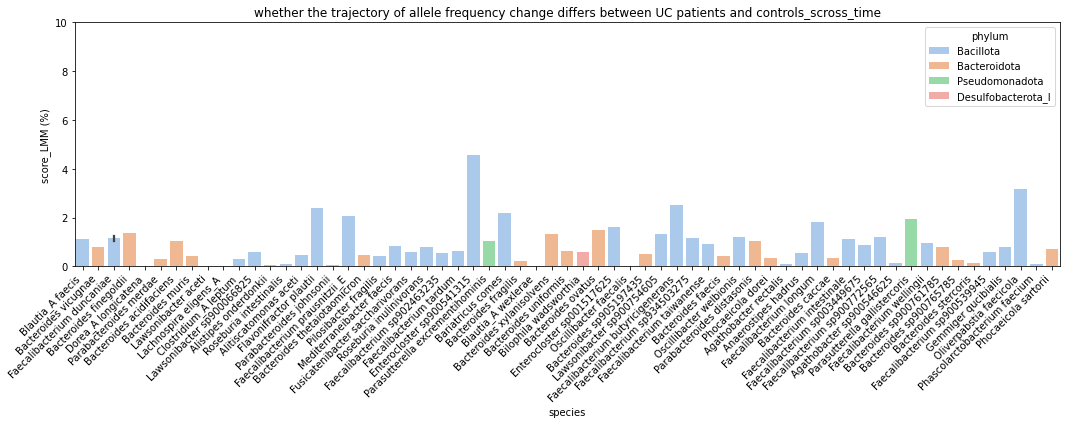

In [97]:
#whether the trajectory of allele frequency change differs between UC patients and controls
plt.figure(figsize=(15,6))
sns.barplot(data=df_lmm_across_time_control_UC, x='species', y='score_LMM (%)', palette='pastel', hue='phylum')
plt.xticks(rotation=45, ha='right')
# Set y-axis from 0 to 1 with step 0.2
plt.ylim(0, 10)
#plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.title("whether the trajectory of allele frequency change differs between UC patients and controls_scross_time")
plt.tight_layout()
plt.show()

In [91]:
df_lmm_control = pd.read_csv('MAG/scores_lmm_across_time-initial_second-UC_control_control-MAGs.tsv',sep='\t')

In [98]:
df_lmm_control

,MAG_ID,domain,phylum,class,order,family,genus,species,total_sites_per_group_LMM,significant_sites_per_group_LMM,score_LMM (%),grouped_by
0,MGYG000000003,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes shahii,39065,926,2.370408,MAG_ID
1,MGYG000000013,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides vicugnae,33096,288,0.870196,MAG_ID
2,MGYG000000022,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,50475,1280,2.535909,MAG_ID
3,MGYG000000029,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides finegoldii,29257,224,0.765629,MAG_ID
4,MGYG000000038,Bacteria,Bacillota,Clostridia,Lachnospirales,Lachnospiraceae,Dorea_A,Dorea_A longicatena,77,0,0.000000,MAG_ID
...,...,...,...,...,...,...,...,...,...,...,...,...
77,MGYG000004658,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes finegoldii,31171,1312,4.209040,MAG_ID
78,MGYG000004679,Bacteria,Bacillota,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium duncaniae,11941,140,1.172431,MAG_ID
79,MGYG000004768,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes avicola,762,6,0.787402,MAG_ID
80,MGYG000004769,Bacteria,Bacillota,Negativicutes,Acidaminococcales,Acidaminococcaceae,Phascolarctobacterium,Phascolarctobacterium faecium,8030,16,0.199253,MAG_ID


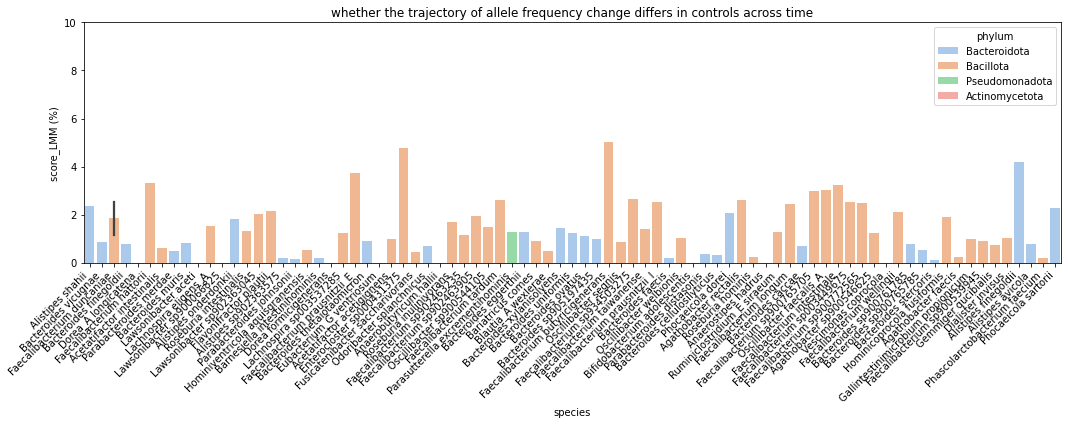

In [96]:
#whether the trajectory of allele frequency change differs in controls across time
plt.figure(figsize=(15,6))
sns.barplot(data=df_lmm_control, x='species', y='score_LMM (%)', palette='pastel', hue='phylum')
plt.xticks(rotation=45, ha='right')
# Set y-axis from 0 to 1 with step 0.2
plt.ylim(0, 10)
#plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.title("whether the trajectory of allele frequency change differs in controls across time")
plt.tight_layout()
plt.show()

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_77984/343653722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score_LMM (%)", y="species", data=df_sorted, palette="viridis")


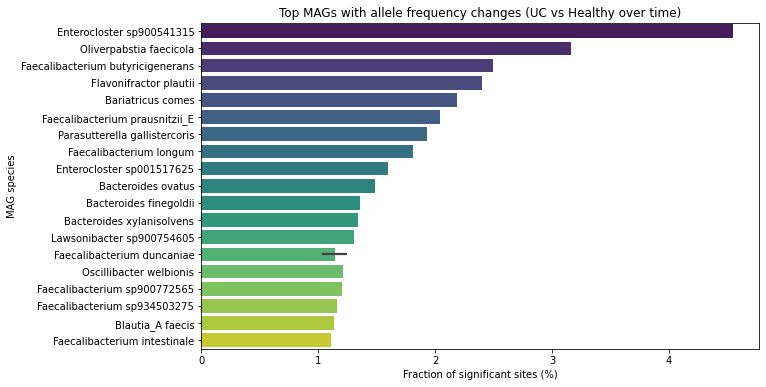

In [7]:
# Sort by score
df_sorted = df.sort_values("score_LMM (%)", ascending=False).head(20)

# Plot top 20 MAGs
plt.figure(figsize=(10,6))
sns.barplot(x="score_LMM (%)", y="species", data=df_sorted, palette="viridis")

plt.xlabel("Fraction of significant sites (%)")
plt.ylabel("MAG species")
plt.title("Top MAGs with allele frequency changes (UC vs Healthy over time)")
plt.show()

In [12]:
ls

AlleleFre.ipynb
MAG/
MGYG000000002_allele_frequency_changes.tsv.gz
MGYG000000002_allele_frequency_changes_mean.tsv.gz
MGYG000000002_allele_frequency_changes_no_zero-diff.tsv.gz
MGYG000000002_allele_frequency_longitudinal.tsv.gz


In [8]:
pwd

'/Users/dongminjin/Documents/AlleleFlux_analysis'

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load longitudinal allele frequency output
df = pd.read_csv("MGYG000000002_allele_frequency_changes_mean.tsv.gz", sep="\t")

In [17]:
df.columns

Index(['contig', 'gene_id', 'position', 'replicate', 'group',
       'A_frequency_diff_mean', 'T_frequency_diff_mean',
       'G_frequency_diff_mean', 'C_frequency_diff_mean', 'subjectID_count'],
      dtype='object')

In [18]:
df.shape

(63681, 10)

In [20]:
df.head()

,contig,gene_id,position,replicate,group,A_frequency_diff_mean,T_frequency_diff_mean,G_frequency_diff_mean,C_frequency_diff_mean,subjectID_count
0,MGYG000000002_1,MGYG000000002_1_1,840,10,UC,0.000000,0.0,0.0,0.000000,1
1,MGYG000000002_1,MGYG000000002_1_1,840,18,UC,0.000000,0.0,0.0,0.000000,1
2,MGYG000000002_1,MGYG000000002_1_1,840,2,UC,0.000000,0.0,0.0,0.000000,1
3,MGYG000000002_1,MGYG000000002_1_1,840,3,UC,0.142857,0.0,0.0,-0.142857,1
4,MGYG000000002_1,MGYG000000002_1_1,840,8,UC,0.000000,0.0,0.0,0.000000,1


In [21]:
print(df['group'].unique())

['UC' 'control']


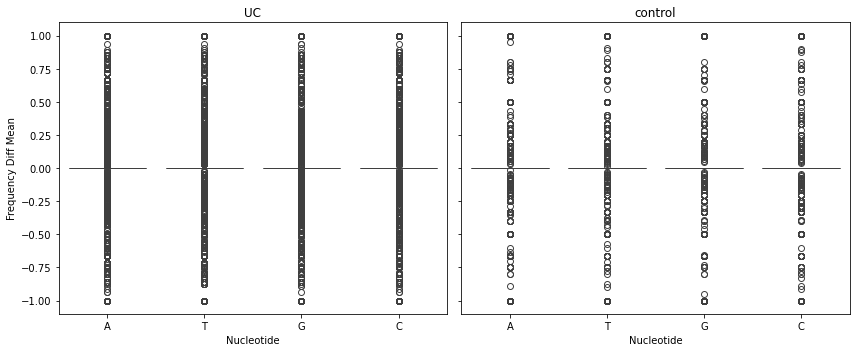

In [31]:
# Melt the frequency_diff_mean columns to long format
df_long = df.melt(
    id_vars=['contig', 'gene_id', 'position', 'replicate', 'group', 'subjectID_count'],
    value_vars=['A_frequency_diff_mean', 'T_frequency_diff_mean', 'G_frequency_diff_mean', 'C_frequency_diff_mean'],
    var_name='nucleotide',
    value_name='frequency_diff_mean'
)

# Optional: simplify nucleotide labels
df_long['nucleotide'] = df_long['nucleotide'].str[0]  # keep just 'A', 'T', 'G', 'C'

# Identify groups
groups = df_long['group'].unique()
if len(groups) != 2:
    print("Warning: more than two groups found!")

# Set up figure with two panels
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, grp in zip(axes, groups):
    sns.boxplot(
        x='nucleotide',
        y='frequency_diff_mean',
        data=df_long[df_long['group']==grp],
        ax=ax
    )
    ax.set_title(grp)
    ax.set_xlabel('Nucleotide')
    ax.set_ylabel('Frequency Diff Mean')

plt.tight_layout()
plt.show()

In [29]:
file = "MGYG000000002_allele_frequency_longitudinal.tsv.gz"
df_longitudinal = pd.read_csv(file, sep='\t')
df_longitudinal.head()

,MAG_ID,contig,position,ref_base,total_coverage,A,C,G,T,N,...,group,subjectID,replicate,time,breadth,genome_size,A_frequency,T_frequency,G_frequency,C_frequency
0,MGYG000000002,MGYG000000002_1,36,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
1,MGYG000000002,MGYG000000002_1,37,G,1,0,0,1,0,0,...,control,M2047,14,second,0.107042,4441003,0.0,0.0,1.0,0.0
2,MGYG000000002,MGYG000000002_1,38,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
3,MGYG000000002,MGYG000000002_1,39,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
4,MGYG000000002,MGYG000000002_1,40,T,1,0,0,0,1,0,...,control,M2047,14,second,0.107042,4441003,0.0,1.0,0.0,0.0
